# Feature Extraction

In this notebook, we will learn about diffirent techniques for extracting *corner features*.

Why is a corner so special?
Because, since it is the intersection of two edges, it represents a point in which the directions of these two edges change. Hence, the gradient of the image (in both directions) have a high variation, which can be useful in many computer vision applications. 

What algorithms are there to extract features? What are keypoints and descriptors?, and how to plot all these features in images? We will learn answers to all these questions. And towards the end we are going to see how all these features can be used in applications like face matching or book cover matching. 

**What is Feature ?**

In computer vision, usually we need to find matching points between different frames of an environment. Why? If we know how two images relate to each other, we can use both images to extract information of them.
When we say matching points we are referring, in a general sense, to characteristics in the scene that we can recognize easily. We call these characteristics features.

So, what characteristics should a feature have? It must be uniquely recognizable. There are different types of Image Features, to mention a few:

- Edges
- Corners (also known as interest points)
- Blobs (also known as regions of interest)

We are going to see the following Corner detection algorithms

- Harris corner detection
- SIFT (Scale-Invariant Feature Transform)
- FAST algorithm for corner detection*

Let's start with our first algorithm

## Harris Corner Detection

Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation, and illumination. Harris corner detection technique is rotation,translation and illumination invariant that means even if the image is rotated, shifted or change brightness we will be able to detect the corners exactly. However they are scale variant, if the corners are zoomed we will loose the shape in the selected region and the detectors will not be able to identify them.

That is one disadvantage of harris corner detection technique.

![](../images/harris_corner.jpg)

Before starting import all the libraries needed.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def read_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_img(img):
    plt.figure(figsize=(10,8))
    plt.axis(False)
    plt.imshow(img, cmap='gray');

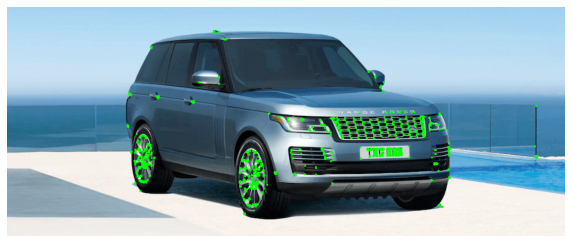

In [9]:
img = read_img('images/car.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

dst = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)
# dilate to mark the corners
dst = cv2.dilate(dst, None)
img[dst > (0.01 * dst.max())] = [0,255,0]

plot_img(img)

**Explanation:**

- we are using built-in method `cv2.cornerHarris()` in which first parameter is gray scaled image, second parameter is blocksize(i.e. the size of neighborhood to be considered for corner detection), third parameter is ksize(kernel size), fourth parameter is *Harris detector free parameter* in the equation.

- then we do **dialation** on an image. It also means it increases the white region in the image or size of foreground object. [Click here to know more about dialation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#dilation).

- After that we are applying some threshold on all the pixel value which are greater than 1% of maximum pixel value in `dst`. This allows us to filter out all the noise or misinterpreted corners from the image.

So the **advantanges** are rotation, shift and illumination invariant and **disadvantages** is it's scale invariant i.e it cannot detect corners when we scale up/down the image. 

This disadvantage is overcome by The SIFT algorithm. We will see SIFT Algorithm next.

## SIFT Algorithm

It's full form is **Scale Invariate Feature Transform**. Here the name tells us that SIFT is going to be scale invariant. For example, check a simple image below. A corner in a small image within a small window is flat when it is zoomed in the same window. 

![](../images/small_corner.jpg)

We first have to create a `sift` object. just line we did for face haar cascade, remembered?

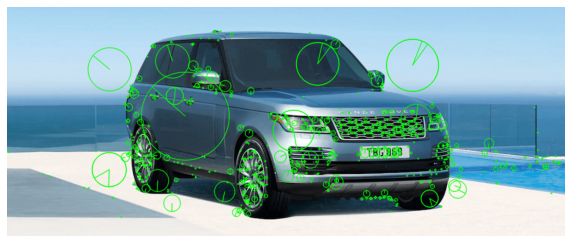

In [10]:
img = read_img('images/car.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sift = cv2.xfeatures2d.SIFT_create() # Creating an object
kp, des = sift.detectAndCompute(gray_img, None)
kp_img = cv2.drawKeypoints(img, 
                           kp, 
                           None, 
                           color=(0, 255, 0), 
                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plot_img(kp_img)

**Explanation:**

- As you must have seen the implementation of SIFT is a bit different then other algorithms. we are using `cv2.xfeatures2d.SIFT_create()` to create an object and store it in `sift` variable. 

- `sift.detectAndCompute()` directly find keypoints and descriptors in a single step. It takes two parameters first is source image and second is the mask if we want to search only a part of image. In return we get two things. First, all the keypoint in an image and second, is vector form of 128 bin oreientation of those keypoints. 

- Finally, we use the built-in `cv2.drawKeypoints()` method, which have parameters as source image, the keypoints, the output image the tuple of 3 color channels and the last one is the flags. Here, we are passing  `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS` to it, i.e. for each keypoint the circle around keypoint with keypoint size and orientation will be drawn. By default if flag is not provided it only draw the keypoint without the circle around it.

SIFT is scale invariant but its very slow to compute tha keypoints and descriptors.

To overcome this disadvantage we use FAST algorithm. Let's see FAST next.

## Features from accelerated segment test (FAST)

Detecting multiple interest points in adjacent locations is another problem. It is solved by using Non-maximum Suppression.

Let's now implement all the steps in these algorithm including non-maximal suppresssion to keep it true or false. 

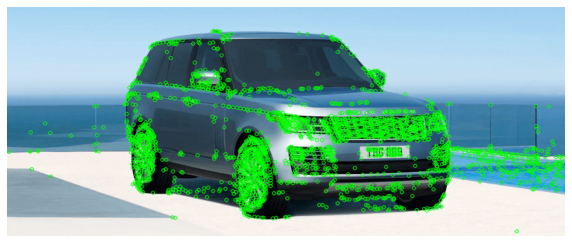

In [12]:
img = read_img('images/car.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(True)

kp = fast.detect(gray_img,None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))

plot_img(kp_img)

**Explanation:**

- we start by creating an object of fast feature detector using built-in method `cv2.FastFeatureDetector_create()` similar to sift implementation.
- we then set non-max suppression value as True (i.e turn on non-max suppression). 

    The FAST algorithm works on pixel level, so it can detecting multiple interest points in adjacent locations. This would make the algorithm very slow. It is solved by using Non-maximum Suppression.

- Finally to detect & compute the keypoints and descriptors, we use `cv2.detectAndCompute()`.

It's advantage is that it is faster than all other algorithm and disadvantage is that FAST does not detect corners on computer-generated images that are perfectly aligned to the x-axes and y-axes. 

## Binary Robust Independent Elementary Features(BRIEF)

We can use binary strings as an efficient feature point descriptor, this approach is called BRIEF. BRIEF is very fast both to build and to match. BRIEF easily outperforms other fast descriptors such as SURF and SIFT in terms of speed and terms of recognition rate in many cases.

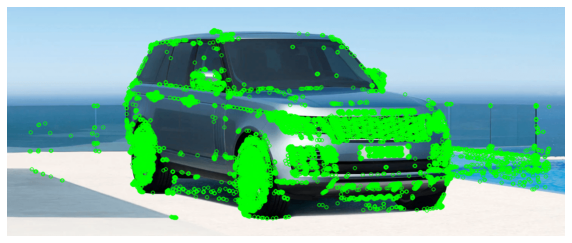

In [13]:
img = read_img('images/car.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)
kp = fast.detect(gray_img,None)

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp,des = brief.compute(img,kp)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))

plot_img(kp_img)

**Explanation:**

- Above code is completely different from all the algorithms. As you see we are using fast keypoint detection along with brief descriptor. This is because BRIEF does not have `detect()` function, so it uses other algorithms to detect the keypoints and then use its `compute()` function.

- We are first using FAST algorithm to detect keypoints.

- Then we use BRIEF's keypoint descriptor. And draw keypoints on the image.

## ORB

ORB is an efficient open source alternative to SIFT and SURF. Even though it computes less key points when compared to SIFT and SURF yet they are effective. It uses FAST to detect the key points and BRIEF techniques to compute the image descriptors.

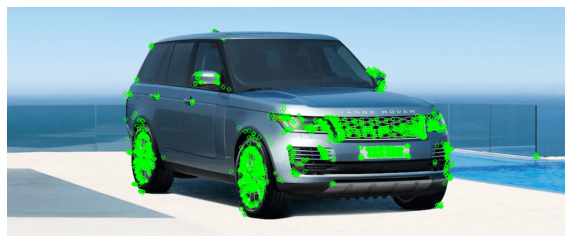

In [14]:
img = read_img('images/car.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

plot_img(kp_img);

Now that you know how these techniques work, here are some interesting applications based on them.

## Applications

**Feature Matching**

Lets load two different images of the harry potter book.

In [15]:
img1 = cv2.imread('images/harry.jpg')
cv2.imshow('Image 1', img1)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('images/harry2.jpg')
cv2.imshow('Image 2', img2)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

cv2.waitKey(0)
cv2.destroyAllWindows()

Now, lets keypoints and descriptors from both the images, using SIFT

In [16]:
sift = cv2.xfeatures2d.SIFT_create() 
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)

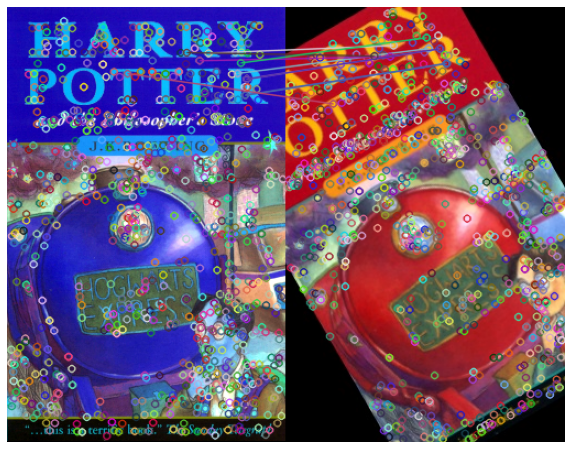

In [18]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# draw first 10 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None)

# Display the best matching points
plot_img(match_img);

**Explanation:**

Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

For BF matcher, first we have to create the BFMatcher object using `cv2.BFMatcher()`. It takes two optional params. First one is `normType`. It specifies the distance metric to be used. By default, it is `cv2.NORM_L2`. It is good for SIFT, SURF. For binary string based descriptors like ORB, BRIEF, BRISK etc, `cv2.NORM_HAMMING` should be used, which used Hamming distance as measurement. Second param is boolean variable, `crossCheck` which is false by default. If it is true, Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as the best match and vice-versa. That is, the two features in both sets should match each other.

Once it is created, we use `BFMatcher.match()` to return the best match. Just like we used `cv2.drawKeypoints()` to draw keypoints, `cv2.drawMatches()` helps us to draw the matches. It stacks two images horizontally and draw lines from first image to second image showing best matches. 

This features matching approach was used in old image search engines and Content based image retrieval systems. As of now, all the state-of-the-art systems use deep learning. 

There are many other applications of that still make use of these techniques. Here is a small list of such applications:

- **Documents Alignment:** Just like camscanner app, you can also write an opencv program to align your documents. You can learn more, [here](https://www.pyimagesearch.com/2020/08/31/image-alignment-and-registration-with-opencv/).
- **Stitching images:** You can easily create a panaroma image using opencv. Here is a [blog](https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/) discussing the process in detail.

In the next notebook, we will learn about another class of computer vision problem called Optical Character Recognition, OCR for short.